In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "동래구"
region_code = "7"
target_date = "2017-01-05"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("동래구2017_1q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2017-01-05,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6680,동래구,8175,동래구,1495,22.38%,"7,428"
1,2017-01-05,간장,오복왕표 0.9ℓ 1병,6250,동래구,6260,동래구,10,0.16%,"6,255"
2,2017-01-05,고등어,30㎝정도 500g 1마리,3500,동래구,4000,동래구,500,14.29%,"3,750"
3,2017-01-05,달걀,오경슈퍼란60g정도 10개,4200,동래구,4500,동래구,300,7.14%,"4,350"
4,2017-01-05,닭고기,육계 1.0㎏,4000,동래구,4285,동래구,285,7.12%,"4,143"
5,2017-01-05,대파,1.0㎏,3685,동래구,4000,동래구,315,8.55%,"3,843"
6,2017-01-05,돼지고기,삼겹살 500g,5900,동래구,9800,동래구,3900,66.1%,"7,850"
7,2017-01-05,두부,500g 판두부(국산포장두부 420g) 1모,3849,동래구,4365,동래구,516,13.41%,"4,107"
8,2017-01-05,라면,신라면 120g 1봉지,650,동래구,676,동래구,26,4.0%,663
9,2017-01-05,맥주,하이트 500㎖ 1병,1330,동래구,2000,동래구,670,50.38%,"1,665"


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "동래구"
region_code = "7"
target_date = "2017-04-06"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("동래구2017_2q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2017-04-06,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6250,동래구,7430,동래구,1180,18.88%,"6,840"
1,2017-04-06,간장,오복왕표 0.9ℓ 1병,6230,동래구,6250,동래구,20,0.32%,"6,240"
2,2017-04-06,고등어,30㎝정도 500g 1마리,5500,동래구,6285,동래구,785,14.27%,"5,893"
3,2017-04-06,달걀,오경슈퍼란60g정도 10개,3200,동래구,3900,동래구,700,21.88%,"3,550"
4,2017-04-06,닭고기,육계 1.0㎏,5238,동래구,7380,동래구,2142,40.89%,"6,309"
5,2017-04-06,대파,1.0㎏,3000,동래구,5000,동래구,2000,66.67%,"4,000"
6,2017-04-06,돼지고기,삼겹살 500g,6700,동래구,10900,동래구,4200,62.69%,"8,800"
7,2017-04-06,두부,500g 판두부(국산포장두부 420g) 1모,3820,동래구,4365,동래구,545,14.27%,"4,093"
8,2017-04-06,라면,신라면 120g 1봉지,676,동래구,680,동래구,4,0.59%,678
9,2017-04-06,맥주,하이트 500㎖ 1병,1410,동래구,1420,동래구,10,0.71%,"1,415"


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "동래구"
region_code = "7"
target_date = "2017-07-06"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("동래구2017_3q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2017-07-06,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7430,동래구,9375,동래구,1945,26.18%,"8,403"
1,2017-07-06,간장,오복왕표 0.9ℓ 1병,6230,동래구,6350,동래구,120,1.93%,"6,290"
2,2017-07-06,고등어,30㎝정도 500g 1마리,3725,동래구,5000,동래구,1275,34.23%,"4,363"
3,2017-07-06,달걀,오경슈퍼란60g정도 10개,3980,동래구,4000,동래구,20,0.5%,"3,990"
4,2017-07-06,닭고기,육계 1.0㎏,5300,동래구,6100,동래구,800,15.09%,"5,700"
5,2017-07-06,대파,1.0㎏,2857,동래구,3100,동래구,243,8.51%,"2,979"
6,2017-07-06,돼지고기,삼겹살 500g,8900,동래구,11920,동래구,3020,33.93%,"10,410"
7,2017-07-06,두부,500g 판두부(국산포장두부 420g) 1모,3820,동래구,4365,동래구,545,14.27%,"4,093"
8,2017-07-06,라면,신라면 120g 1봉지,676,동래구,680,동래구,4,0.59%,678
9,2017-07-06,맥주,하이트 500㎖ 1병,1410,동래구,1420,동래구,10,0.71%,"1,415"


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "동래구"
region_code = "7"
target_date = "2017-10-12"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("동래구2017_4q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2017-10-12,가루비누,"세탁용세제(LG테크),가루형,3.0kg",9350,동래구,9375,동래구,25,0.27%,"9,363"
1,2017-10-12,간장,오복왕표 0.9ℓ 1병,6230,동래구,6250,동래구,20,0.32%,"6,240"
2,2017-10-12,고등어,30㎝정도 500g 1마리,3125,동래구,4500,동래구,1375,44.0%,"3,813"
3,2017-10-12,달걀,오경슈퍼란60g정도 10개,3000,동래구,3000,동래구,0,0.0%,"3,000"
4,2017-10-12,닭고기,육계 1.0㎏,5238,동래구,5250,동래구,12,0.23%,"5,244"
5,2017-10-12,대파,1.0㎏,4257,동래구,4500,동래구,243,5.71%,"4,379"
6,2017-10-12,돼지고기,삼겹살 500g,8400,동래구,11300,동래구,2900,34.52%,"9,850"
7,2017-10-12,두부,500g 판두부(국산포장두부 420g) 1모,2800,동래구,4365,동래구,1565,55.89%,"3,583"
8,2017-10-12,라면,신라면 120g 1봉지,676,동래구,680,동래구,4,0.59%,678
9,2017-10-12,맥주,하이트 500㎖ 1병,1410,동래구,1420,동래구,10,0.71%,"1,415"


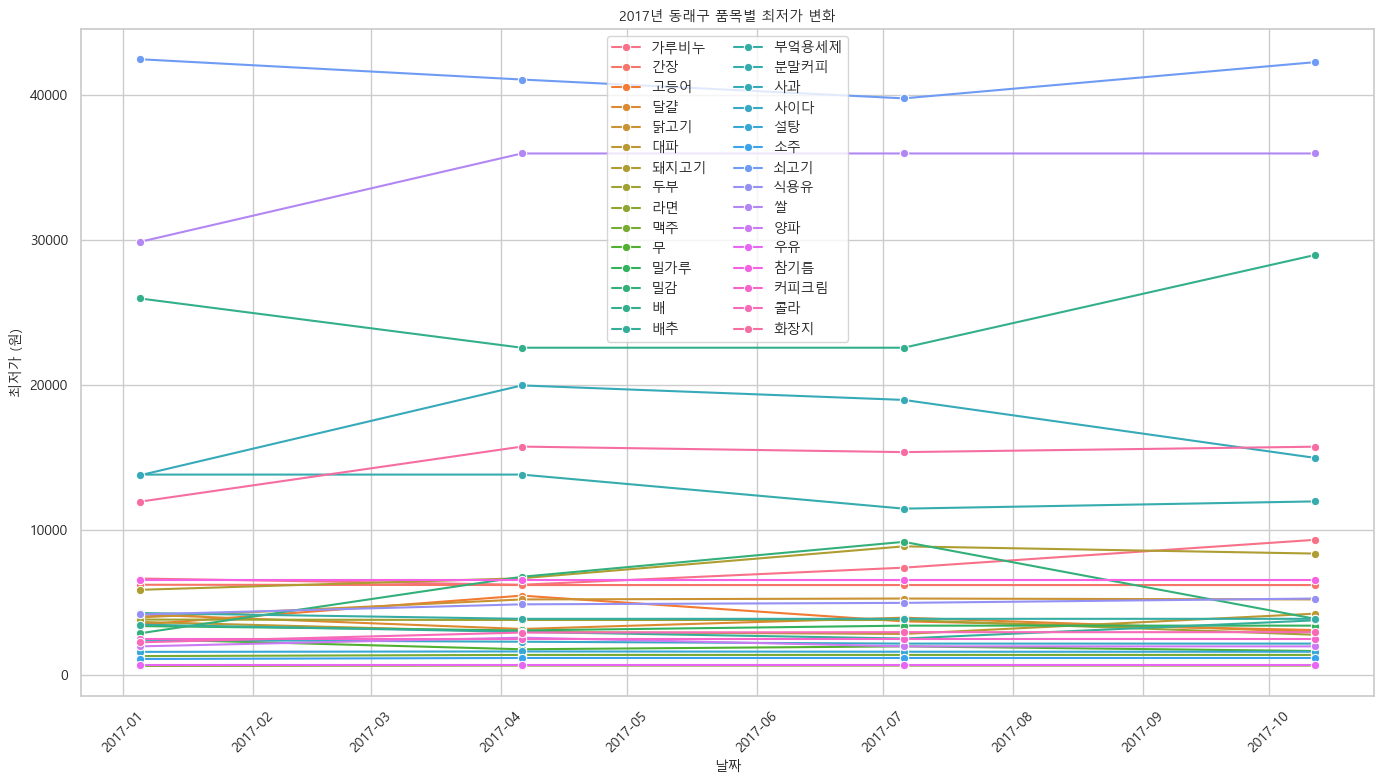

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("동래구2017_1q.csv")
q2 = pd.read_csv("동래구2017_2q.csv")
q3 = pd.read_csv("동래구2017_3q.csv")
q4 = pd.read_csv("동래구2017_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2017년 동래구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("동래구2017_min.csv", index=False, encoding="utf-8-sig")

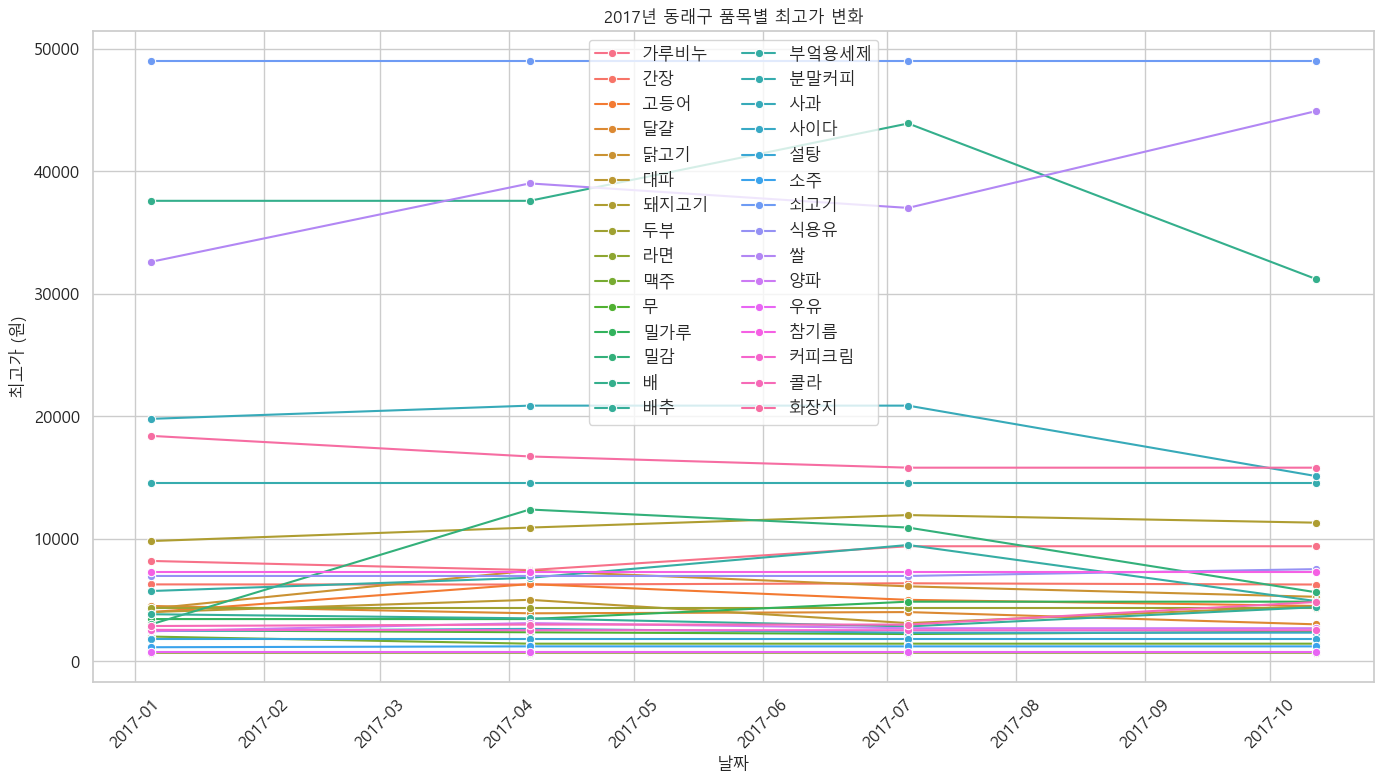

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("동래구2017_1q.csv")
q2 = pd.read_csv("동래구2017_2q.csv")
q3 = pd.read_csv("동래구2017_3q.csv")
q4 = pd.read_csv("동래구2017_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2017년 동래구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("동래구2017_max.csv", index=False, encoding="utf-8-sig")